In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Data Generation

In [24]:
mean1 = np.array([0.5 , 0.5])
mean2 = np.array([3.0 , 3.0])

cov1 = np.array([[1.0 , 0.2] , [0.2 , 1.1]])
cov2 = np.array([[1.0 , 0.3] , [0.3 , 1.1]])

dist1 = np.random.multivariate_normal(mean1 , cov1 , 500)
dist2 = np.random.multivariate_normal(mean2 , cov2 , 500)

print dist1.shape
print dist2.shape

(500, 2)
(500, 2)


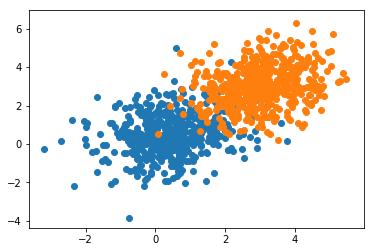

In [25]:
plt.scatter(dist1[: , 0] , dist1[: , 1])
plt.scatter(dist2[: , 0] , dist2[: , 1])

In [26]:
rows = dist1.shape[0] + dist2.shape[0]
cols = dist1.shape[1] + 1

data = np.zeros((rows , cols))
print data.shape

data[:dist1.shape[0] , :dist1.shape[1]] = dist1
data[dist1.shape[0] : , :dist2.shape[1]] = dist2
#dist1.shape[1] = dist2.shape[1] as number of columns are same
data[dist1.shape[0]: rows ,-1] = 1.0#-1 is last column

#Or we concatenate too

(1000, 3)


In [27]:
np.random.shuffle(data)#Doesn't return something it just shuffles the data
print data[:10]

[[ 2.61960577  3.73978919  1.        ]
 [ 3.53420953  1.81656725  1.        ]
 [ 2.26173381  3.03587783  1.        ]
 [ 3.16738185  2.78720257  1.        ]
 [ 0.12230618  0.02233826  0.        ]
 [-0.20460707  0.73369299  0.        ]
 [ 3.93389352  5.03865667  1.        ]
 [ 2.66969059  2.56424666  1.        ]
 [ 0.38404308 -0.49372243  0.        ]
 [-0.28062412 -0.8322514   0.        ]]


# Data Splitting

In [28]:
split = int(0.75*data.shape[0])
#print split
X_train = data[:split , :-1]#all columns except the last
y_train = data[:split , -1]#only last column

X_test = data[split: , :-1]
y_test = data[split: , -1]

print X_train.shape
print X_test.shape

print '-'*25

print y_train.shape
print y_test.shape

(750, 2)
(250, 2)
-------------------------
(750,)
(250,)


# Functions

In [29]:
#sigmoid translates into probability
#In binary classification we use cost function of cost entrpy

#Sigmoid function for translating the output b/w 0 to 1
def sigmoid(z):
    sig = 1.0 / (1 + np.exp(-1*z))
    return sig

#Hypothesis function is just sigmoid applied to y predicted
def hypothesis(x_sample , w , b):
    h = (x_sample*w).sum() + b
    return sigmoid(h)

#Getting error
def get_error(x , w , y , b):
    error = 0.0
    m = x.shape[0]
    
    for i in range(m):
        if y[i] == 0:
            #print hypothesis(x[i] ,w ,b)
            
            add_term = -1 * (np.log(1 - hypothesis(x[i] , w , b)))
            error = error + add_term
        
        else:
            add_term = -1 * (np.log(hypothesis(x[i] , w , b)))
            error = error + add_term
            
        # -ve sign is appied to just symbolising that large error is large
        # in short we can say -vesign is being applied due to the log only
    error = error/m
    return error
'''
instead of if else we can simply write this::-->>

-(ylog(y^) + (1-y)log(1 - y^))

coz when suppose y=0 then 1st term willbe zero and only seconf term will be calculated
and
when y=1 then second term will be zero so only first term will be calculated

'''

    

'\ninstead of if else we can simply write this::-->>\n\n-(ylog(y^) + (1-y)log(1 - y^))\n\ncoz when suppose y=0 then 1st term willbe zero and only seconf term will be calculated\nand\nwhen y=1 then second term will be zero so only first term will be calculated\n\n'

In [30]:
def get_gradients(x , w , y , b):
    
    grad_w = np.zeros(w.shape[0])#creating a 2d matrix of zeros in this case 2x2
    grad_b = 0
    
    m = x.shape[0]
    for i in range(m):
        grad_w = grad_w + (hypothesis(x[i] , w , b) - y[i])*x[i]#matrix multiplication
        grad_b = grad_b + (hypothesis(x[i] , w , b) - y[i])*1
        
    #grad_w = grad_w/m
    #grad_b = grad_b/m
        
    return [grad_w , grad_b]

In [31]:
def optimizer(x , w , y , b , learning_rate = 0.001):
    
    error = get_error(x , w , y , b)
    
    [grad_w , grad_b] = get_gradients(x , w , y , b)
    
    b = b - learning_rate*grad_b
    w = w - learning_rate*grad_w
    
    return error , w , b


In [32]:
def logistic_regression(X_train , y_train , nb_epochs = 2 , learning_rate = 0.0001 ):
    
    loss = []
    
    #Parameter Initialisation
    
    W = np.array([0.3 , 0.2])
    b = 3.6
    
    
    for i in range(nb_epochs):
        
        error , W , b = optimizer(X_train , W , y_train , b , learning_rate)
        loss.append(error)
        
    W_final = W
    b_final = b
    
    return loss , W_final , b_final
    

In [33]:
loss , weights , bias = logistic_regression(X_train , y_train , nb_epochs=100 , learning_rate = 0.001)
print weights , bias

[1.23291323 1.04268566] -3.7232022524050534


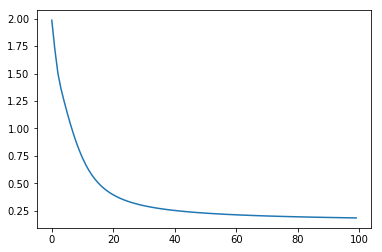

In [34]:
plt.plot(loss)
plt.show()
#print loss

# Accuracy function

In [44]:
pred = []
a = X_test.shape[0]
acc = 0
for i in range(a):
    y = hypothesis(X_test[i] , weights , bias)
    if y>0.5:
        k = 1
    else:
        k = 0
    pred.append(k)
#print pred
print '-'*25
#print (pred==y_test).sum()/y_test.shape
for i in range(y_test.shape[0]):
    if pred[i] == y_test[i]:
        acc += 1
    else:
        pass
print (float(acc)/y_test.shape[0])*100 , '%'

-------------------------
94.4 %


# LogisticRegression from SK-Learn Model

In [47]:
'''Sk learn model is also linear model 
it fails for non linear model like circular model '''
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

lr.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
print lr.score(X_test , y_test)*100 , '%'

94.8 %
